##
Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

Title: Bank Marketing


Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   
Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

Number of Attributes: 16 + output attribute.

Attribute information:

   For more information, read [Moro et al., 2011].

   #Input variables:
   #bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   #related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   #other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
#from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler


In [249]:
df = pd.read_csv('/Users/jetindersingh/Desktop/bank-full.csv')
df = df.drop(columns= ['day','month'])
#.head()
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,211,3,other,no


In [250]:
df


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,211,3,other,no


In [252]:
#df['marital'].unique()
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])
#df['y'] = df['y'].map({'yes':1, 'no':0})

df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,129,4,211,3,1,0


In [264]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns= df.columns)



In [265]:
df_scaled

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,-0.711861,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.169194,-0.576829,2.989044,2.041734,-2.579961,-0.360902
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,-0.303898,-0.576829,2.899143,0.270124,-2.579961,-0.360902
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-0.250017,0.387967,-0.407218,-0.320413,0.444413,-0.360902
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-0.146102,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,-0.583410,0.875617,-0.424756,-0.723642,0.250315,0.709566,-0.407218,-0.320413,0.444413,-0.360902
4517,1.496912,0.488060,-0.246429,1.026680,7.647669,-1.573671,0.875617,2.354292,1.495133,-0.427057,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
4518,1.496912,1.409618,-0.246429,-0.309038,-0.130759,-0.374724,-1.142051,-0.424756,-0.723642,-0.434754,2.639160,-0.407218,-0.320413,0.444413,-0.360902
4519,-1.245394,-1.047871,-0.246429,-0.309038,-0.130759,-0.094925,-1.142051,-0.424756,-0.723642,-0.519426,0.387967,1.710451,1.451197,-1.571836,-0.360902


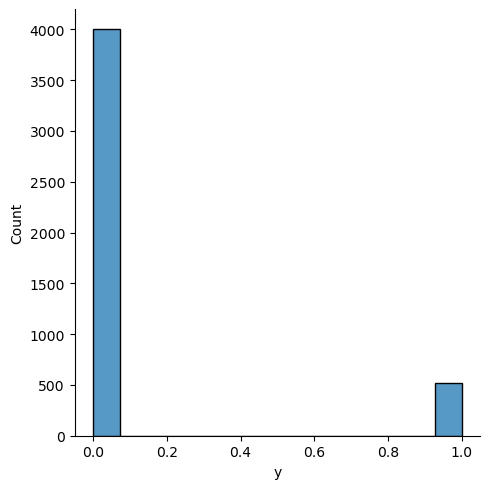

In [266]:
sns.displot(df['y'])


the data is highly imbalanced. Appropriated balancing methods should be applied for modeling 

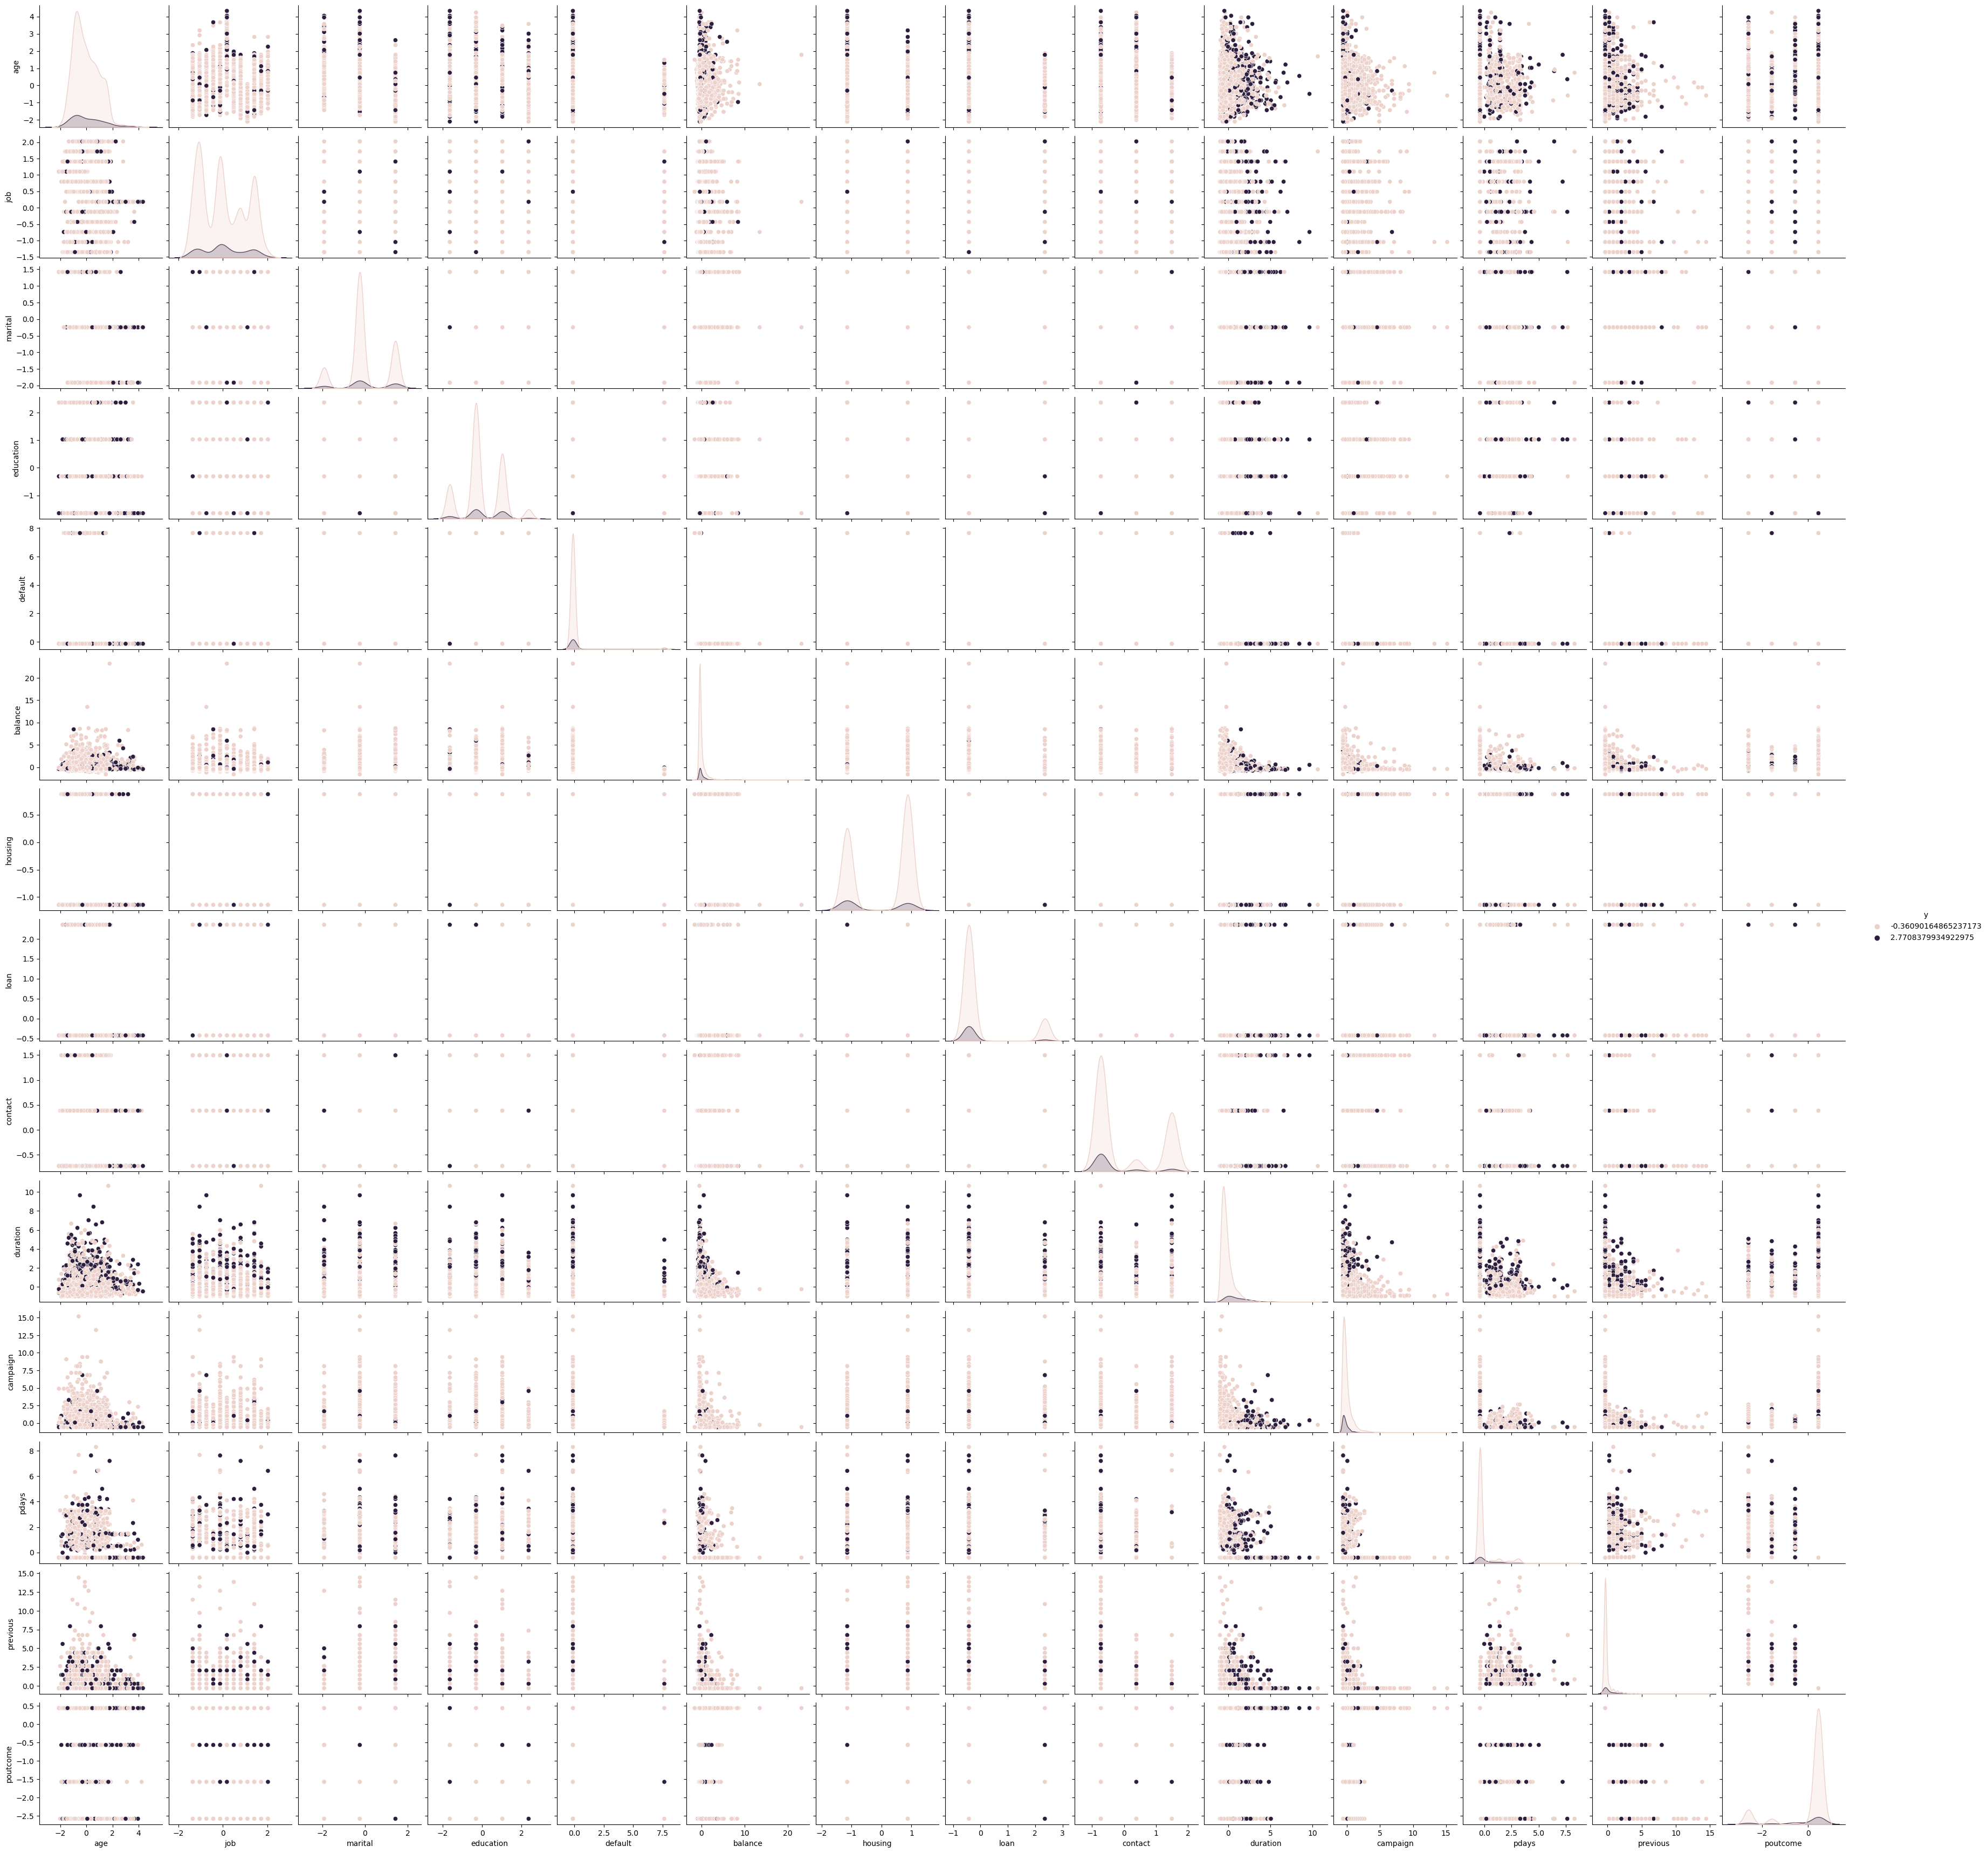

In [267]:
sns.pairplot(df_scaled, hue= 'y')

In [268]:
df_corr  = df_scaled.corr()
df_corr

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
duration,-0.002367,-0.006739,0.006619,-0.014878,-0.011615,-0.015950,0.015740,-0.004997,-0.011380,1.000000,-0.068382,0.010380,0.018080,0.000478,0.401118


<AxesSubplot: >

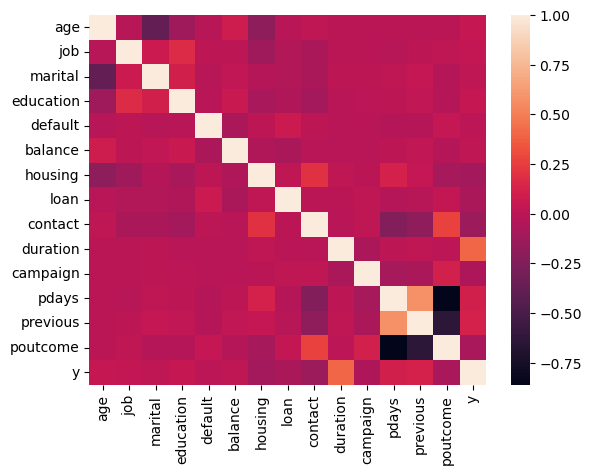

In [269]:
sns.heatmap(df_corr)

<AxesSubplot: >

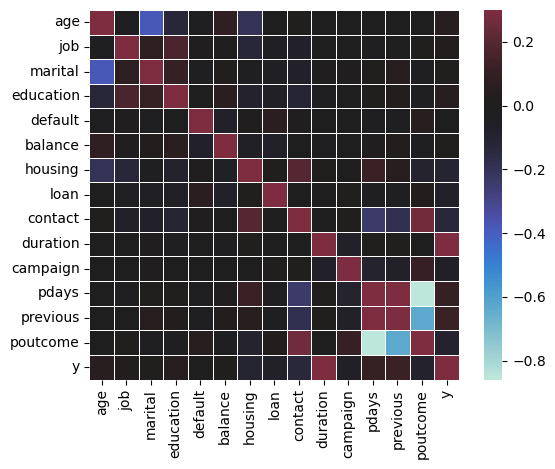

In [270]:
sns.heatmap(df_corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": 1})

# Model Development 

Applying Random oversampling method

In [284]:
# splitting the data in X and targetted variable 'y'

X = df_scaled.drop(columns= 'y', axis= 1)
y = df['y']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [306]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   float64
 2   marital    4521 non-null   float64
 3   education  4521 non-null   float64
 4   default    4521 non-null   float64
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   float64
 7   loan       4521 non-null   float64
 8   contact    4521 non-null   float64
 9   duration   4521 non-null   float64
 10  campaign   4521 non-null   float64
 11  pdays      4521 non-null   float64
 12  previous   4521 non-null   float64
 13  poutcome   4521 non-null   float64
dtypes: float64(14)
memory usage: 494.6 KB


In [307]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4521 entries, 0 to 4520
Series name: y
Non-Null Count  Dtype
--------------  -----
4521 non-null   int64
dtypes: int64(1)
memory usage: 35.4 KB


In [356]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Running the logistic regression model on the unbalanced data using "RandomOverSampler" method

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [388]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# Predicting y value for the test data 

In [389]:
y_preds = lr.predict(X_test)
pd.DataFrame(y_preds)


,0
0,0
1,0
2,0
3,0
4,0
...,...
448,0
449,0
450,0
451,0


In [390]:
score = lr.score(X_test, y_test)
print(score)

0.8962472406181016


In [391]:
# confusion matrix

cm = metrics.confusion_matrix( y_test, y_preds)
print(cm)

[[398   8]
 [ 39   8]]


Text(0.5, 1.0, 'Accuracy Score: 0.8962472406181016')

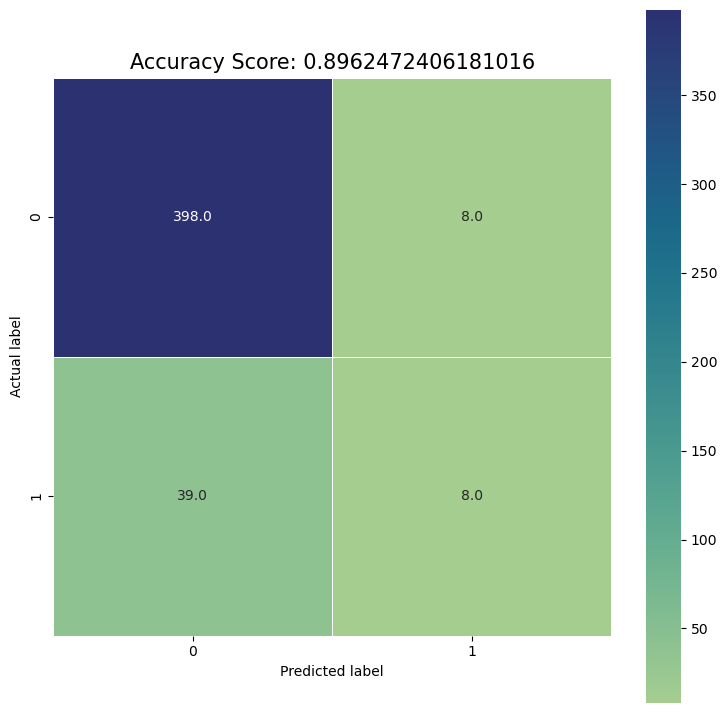

In [392]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'crest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [393]:

acc = accuracy_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.896247        0.5  0.170213  0.253968


In [394]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = ros.fit_resample(X, y)

# Running the logistic regression model on the unbalanced data using "RandomUnderSampler" method

In [395]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [396]:
lr = LogisticRegression()
lr.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [397]:
y_rus_preds = lr.predict(X_test_rus)
pd.DataFrame(y_rus_preds)

,0
0,0
1,0
2,0
3,0
4,0
...,...
448,0
449,0
450,0
451,0


In [398]:
score = lr.score(X_test_rus, y_test_rus)
print(score)

0.8962472406181016


In [399]:
cm = metrics.confusion_matrix( y_test_rus, y_rus_preds)
print(cm)

[[398   8]
 [ 39   8]]


In [400]:
acc = accuracy_score(y_test_rus, y_rus_preds)
prec = precision_score(y_test_rus, y_rus_preds)
rec = recall_score(y_test_rus, y_rus_preds)
f1 = f1_score(y_test_rus, y_rus_preds)

results_rus = pd.DataFrame([['Logistic Regression (RUS)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_rus)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (RUS)  0.896247        0.5  0.170213  0.253968


some of the methods that can further increase the accuracy / f1 score of the above model may include, not limiting to 
#increase the size of the training data: A larger dataset can help the model to learn more patterns and relationships that can lead to better predictions.
#Feature engineering: Feature engineering involves selecting and transforming the most important features in the dataset to improve model performance. It may also involve creating new features that capture additional information about the problem.
#Regularization: Regularization techniques, such as L1 and L2 regularization, can help to prevent overfitting and improve the generalization performance of the model.
#Hyperparameter tuning: Hyperparameters, such as learning rate, regularization strength, and number of iterations, can be tuned to find the optimal configuration for the model.
Imbalanced data handling: If the dataset is imbalanced, then the model can be trained with different class weights or with resampling techniques like oversampling, undersampling or synthetic sampling.
Confusion matrix analysis: Study the confusion matrix and analyze where the errors are happening. Are there more False Positives or False Negatives? The solution will vary based on the type of error that is happening more.

/Users/jetindersingh/Documents/GitHub/Berk_AI_ML/Try_it_Yourself_13.1.ipynb